# Evaluation of all models

**Comparison of all models**:

**ML:**
- Logistic Regression
- Random Forest
- Support Vector Machine
- Deep Neural Network (Multilayer Perceptron)
- Naive Bayes
- K-Nearest Neighbors

**LLMs:**
- GPT (OpenAI)
- Gemini
- Gemma
- Claude
- DeepSeek
- Grok

## 0 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import holoviews as hv
import plotly.graph_objects as go
from holoviews import opts
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change.csv", sep = ",", low_memory = False)

In [3]:
y_pred_lr = pd.read_csv("01_ML/y_pred_ML/y_pred_lr.csv", sep =",")
y_pred_rf = pd.read_csv("01_ML/y_pred_ML/y_pred_rf.csv", sep =",")
y_pred_svc = pd.read_csv("01_ML/y_pred_ML/y_pred_svc.csv", sep =",")
y_pred_dnn = pd.read_csv("01_ML/y_pred_ML/y_pred_dnn.csv", sep =",")
y_pred_knn = pd.read_csv("01_ML/y_pred_ML/y_pred_knn.csv", sep =",")
y_pred_nb = pd.read_csv("01_ML/y_pred_ML/y_pred_nb.csv", sep =",")
y_pred_xgb = pd.read_csv("01_ML/y_pred_ML/y_pred_xgb.csv", sep =",")

In [4]:
y_pred_GPT_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_simple_prompt.csv", sep =",")
y_pred_GPT_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_class_definitions_prompt.csv", sep =",")
y_pred_GPT_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_few_shot_prompt.csv", sep =",")
y_pred_GPT_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_vignette_prompt.csv", sep =",")
y_pred_GPT_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_cot_prompt.csv", sep =",")

In [5]:
y_pred_GPT_o3_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_simple_prompt.csv", sep =",")
y_pred_GPT_o3_class_definitions_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_class_definitions_prompt.csv", sep =",")
y_pred_GPT_o3_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_o3_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_few_shot_prompt.csv", sep =",")
y_pred_GPT_o3_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_vignette_prompt.csv", sep =",")
y_pred_GPT_o3_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_cot_prompt.csv", sep =",")

In [6]:
y_pred_Gemini_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_simple_prompt.csv", sep =",")
y_pred_Gemini_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_class_definitions_prompt.csv", sep =",")
y_pred_Gemini_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_profiled_simple_prompt.csv", sep =",")
y_pred_Gemini_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt.csv", sep =",")
y_pred_Gemini_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_vignette_prompt.csv", sep =",")
y_pred_Gemini_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_cot_prompt.csv", sep =",")

In [7]:
y_pred_Gemma_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_simple_prompt.csv", sep =",")
y_pred_Gemma_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_class_definitions_prompt.csv", sep =",")
y_pred_Gemma_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_profiled_simple_prompt.csv", sep =",")
y_pred_Gemma_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_few_shot_prompt.csv", sep =",")
y_pred_Gemma_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_vignette_prompt.csv", sep =",")
y_pred_Gemma_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_cot_prompt.csv", sep =",")

In [8]:
y_pred_Claude_4_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_simple_prompt.csv", sep =",")
y_pred_Claude_4_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_class_definitions_prompt.csv", sep =",")
y_pred_Claude_4_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/Claude/y_pred_claude_profiled_simple_prompt.csv", sep =",")
y_pred_Claude_4_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_few_shot_prompt.csv", sep =",")
y_pred_Claude_4_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_vignette_prompt.csv", sep =",")
y_pred_Claude_4_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_cot_prompt.csv", sep =",")

In [9]:
y_pred_DeepSeek_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_simple_prompt.csv", sep =",")
y_pred_DeepSeek_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_class_definitions_prompt.csv", sep =",")
y_pred_DeepSeek_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_profiled_simple_prompt.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt.csv", sep =",")
y_pred_DeepSeek_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_vignette_prompt.csv", sep =",")
y_pred_DeepSeek_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_cot_prompt.csv", sep =",")

In [10]:
y_pred_Grok_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_simple_prompt.csv", sep =",")
y_pred_Grok_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_class_definitions_prompt.csv", sep =",")
y_pred_Grok_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_profiled_simple_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt.csv", sep =",")
y_pred_Grok_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_vignette_prompt.csv", sep =",")
y_pred_Grok_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_cot_prompt.csv", sep =",")

In [11]:
# time
time_lr = pd.read_csv("01_ML/times_ML/time_lr.csv", sep =",")
time_rf = pd.read_csv("01_ML/times_ML/time_rf.csv", sep =",")
time_svc = pd.read_csv("01_ML/times_ML/time_svc.csv", sep =",")
time_dnn = pd.read_csv("01_ML/times_ML/time_dnn.csv", sep =",")
time_knn = pd.read_csv("01_ML/times_ML/time_knn.csv", sep =",")
time_nb = pd.read_csv("01_ML/times_ML/time_nb.csv", sep =",")
time_xgb = pd.read_csv("01_ML/times_ML/time_xgb.csv", sep =",")

In [12]:
time_GPT_simple_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_simple_prompt.csv", sep =",")
time_GPT_class_def_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_class_definitions_prompt.csv", sep =",")
time_GPT_profiled_simple_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_profiled_simple_prompt.csv", sep =",")
time_GPT_few_shot_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_few_shot_prompt.csv", sep =",")
time_GPT_vignette_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_vignette_prompt.csv", sep =",")
time_GPT_cot_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_cot_prompt.csv", sep =",")

In [13]:
# time_GPT_o3_simple_prompt_nothinking = pd.read_csv("times_LLMs/GPT/time_GPT_o3_simple_prompt_nothinking.csv", sep = ",")
time_GPT_o3_simple_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_o3_simple_prompt.csv", sep =",")
time_GPT_o3_class_definitions_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_o3_class_definitions_prompt.csv", sep =",")
time_GPT_o3_profiled_simple_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_o3_profiled_simple_prompt.csv", sep =",")
time_GPT_o3_few_shot_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_o3_few_shot_prompt.csv", sep =",")
time_GPT_o3_vignette_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_o3_vignette_prompt.csv", sep =",")
time_GPT_o3_cot_prompt = pd.read_csv("02_LLM/times_LLMs/GPT/time_GPT_o3_cot_prompt.csv", sep =",")

In [14]:
time_Gemini_simple_prompt = pd.read_csv("02_LLM/times_LLMs/Gemini/time_gemini_simple_prompt.csv", sep =",")
time_Gemini_class_def_prompt = pd.read_csv("02_LLM/times_LLMs/Gemini/time_gemini_class_definitions_prompt.csv", sep =",")
time_Gemini_profiled_simple_prompt = pd.read_csv("02_LLM/times_LLMs/Gemini/time_gemini_profiled_simple_prompt.csv", sep =",")
time_Gemini_few_shot_prompt = pd.read_csv("02_LLM/times_LLMs/Gemini/time_gemini_few_shot_prompt.csv", sep =",")
time_Gemini_vignette_prompt = pd.read_csv("02_LLM/times_LLMs/Gemini/time_gemini_vignette_prompt.csv", sep =",")
time_Gemini_cot_prompt = pd.read_csv("02_LLM/times_LLMs/Gemini/time_gemini_cot_prompt.csv", sep =",")

In [15]:
time_Gemma_simple_prompt = pd.read_csv("02_LLM/times_LLMs/Gemma/time_gemma_simple_prompt.csv", sep =",")
time_Gemma_class_def_prompt = pd.read_csv("02_LLM/times_LLMs/Gemma/time_gemma_class_definitions_prompt.csv", sep =",")
time_Gemma_profiled_simple_prompt = pd.read_csv("02_LLM/times_LLMs/Gemma/time_gemma_profiled_simple_prompt.csv", sep =",")
time_Gemma_few_shot_prompt = pd.read_csv("02_LLM/times_LLMs/Gemma/time_gemma_few_shot_prompt.csv", sep =",")
time_Gemma_vignette_prompt = pd.read_csv("02_LLM/times_LLMs/Gemma/time_gemma_vignette_prompt.csv", sep =",")
time_Gemma_cot_prompt = pd.read_csv("02_LLM/times_LLMs/Gemma/time_gemma_cot_prompt.csv", sep =",")

In [16]:
time_Claude_4_simple_prompt = pd.read_csv("02_LLM/times_LLMs/Claude/time_claude_4_simple_prompt.csv", sep =",")
time_Claude_4_class_def_prompt = pd.read_csv("02_LLM/times_LLMs/Claude/time_claude_4_class_definitions_prompt.csv", sep =",")
time_Claude_4_profiled_simple_prompt = pd.read_csv("02_LLM/times_LLMs/Claude/time_claude_profiled_simple_prompt.csv", sep =",")
time_Claude_4_few_shot_prompt = pd.read_csv("02_LLM/times_LLMs/Claude/time_claude_few_shot_prompt.csv", sep =",")
time_Claude_4_vignette_prompt = pd.read_csv("02_LLM/times_LLMs/Claude/time_claude_vignette_prompt.csv", sep =",")
time_Claude_4_cot_prompt = pd.read_csv("02_LLM/times_LLMs/Claude/time_claude_cot_prompt.csv", sep =",")

In [17]:
time_DeepSeek_simple_prompt = pd.read_csv("02_LLM/times_LLMs/DeepSeek/time_deeps_simple_prompt.csv", sep =",")
time_DeepSeek_class_def_prompt = pd.read_csv("02_LLM/times_LLMs/DeepSeek/time_deeps_class_definitions_prompt.csv", sep =",")
time_DeepSeek_profiled_simple_prompt = pd.read_csv("02_LLM/times_LLMs/DeepSeek/time_deeps_profiled_simple_prompt.csv", sep =",")
time_DeepSeek_few_shot_prompt = pd.read_csv("02_LLM/times_LLMs/DeepSeek/time_deeps_few_shot_prompt.csv", sep =",")
time_DeepSeek_vignette_prompt = pd.read_csv("02_LLM/times_LLMs/DeepSeek/time_deeps_vignette_prompt.csv", sep =",")
time_DeepSeek_cot_prompt = pd.read_csv("02_LLM/times_LLMs/DeepSeek/time_deeps_cot_prompt.csv", sep =",")

In [18]:
time_Grok_simple_prompt = pd.read_csv("02_LLM/times_LLMs/Grok/time_grok_simple_prompt.csv", sep =",")
time_Grok_class_def_prompt = pd.read_csv("02_LLM/times_LLMs/Grok/time_grok_class_definitions_prompt.csv", sep =",")
time_Grok_profiled_simple_prompt = pd.read_csv("02_LLM/times_LLMs/Grok/time_grok_profiled_simple_prompt.csv", sep =",")
time_Grok_few_shot_prompt = pd.read_csv("02_LLM/times_LLMs/Grok/time_grok_few_shot_prompt.csv", sep =",")
time_Grok_vignette_prompt = pd.read_csv("02_LLM/times_LLMs/Grok/time_grok_vignette_prompt.csv", sep =",")
time_Grok_cot_prompt = pd.read_csv("02_LLM/times_LLMs/Grok/time_grok_cot_prompt.csv", sep =",")

In [19]:
time = time_DeepSeek_cot_prompt
print("Total hours needed:", round(time.iloc[0, 0] // 60 / 60, 2))
print("Total minutes needed:", time.iloc[0, 0] // 60)
print("Seconds per prompt:", time.iloc[0, 0] / 246)

Total hours needed: 2.03
Total minutes needed: 122.0
Seconds per prompt: 29.880521163707826


### Unification Approaches

In [20]:
y_pred_pov_all_models = pd.read_csv("04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_all_models.csv", sep =",")
y_pred_pov_ml_votes = pd.read_csv("04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_ml_models.csv", sep =",")
y_pred_pov_simple_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_simple_models.csv", sep =",")
y_pred_pov_class_definitions_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_class_definitions_models.csv", sep =",")
y_pred_pov_profiled_simple_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_profiled_simple_models.csv", sep =",")
y_pred_pov_few_shot_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_few_shot_models.csv", sep =",")
y_pred_pov_vignette_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_vignette_models.csv", sep =",")
y_pred_pov_cot_votes = pd.read_csv("04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_cot_models.csv", sep =",")

In [21]:
y_pred_best_LLM_or_best_ML = pd.read_csv(
    "04_Unification/y_pred_unification/OR_unification/y_pred_best_LLM_or_best_ML.csv", sep =",")

In [22]:
y_pred_new_input_dnn = pd.read_csv("04_Unification/y_pred_unification/new_input/y_pred_new_input_dnn.csv", sep =",")
y_pred_new_input_svc = pd.read_csv("04_Unification/y_pred_unification/new_input/y_pred_new_input_svc.csv", sep =",")
y_pred_new_input_svc_2 = pd.read_csv("04_Unification/y_pred_unification/new_input/y_pred_new_input_svc_all.csv", sep =",")


# 1 Metrics

In [23]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train_dnn, X_test_dnn, y_train_dnn, y_test_dnn = train_test_split(
    X_test, y_test, test_size = 0.2, random_state = 42, stratify = y_test
)

print("X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [24]:
# calculate metrics for all models
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = recall_score(y_test, y_pred, average = "macro")
    micro_f1 = recall_score(y_test, y_pred, average = "micro")
    mcc = matthews_corrcoef(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall,
        "sensitivity": sensitivity,
        "specificity": specificity
    }

    return metrics

In [25]:
# calculate metrics for all models
metrics_lr = calculate_metrics(y_test, y_pred_lr)
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_svc = calculate_metrics(y_test, y_pred_svc)
metrics_dnn = calculate_metrics(y_test, y_pred_dnn)
metrics_knn = calculate_metrics(y_test, y_pred_knn)
metrics_nb = calculate_metrics(y_test, y_pred_nb)
metrics_xgb = calculate_metrics(y_test, y_pred_xgb)

In [26]:
metrics_GPT_simple_prompt = calculate_metrics(y_test, y_pred_GPT_simple_prompt)
metrics_GPT_class_def_prompt = calculate_metrics(y_test, y_pred_GPT_class_def_prompt)
metrics_GPT_profiled_simple_prompt = calculate_metrics(y_test, y_pred_GPT_profiled_simple_prompt)
metrics_GPT_few_shot_prompt = calculate_metrics(y_test, y_pred_GPT_few_shot_prompt)
metrics_GPT_vignette_prompt = calculate_metrics(y_test, y_pred_GPT_vignette_prompt)
metrics_GPT_cot_prompt = calculate_metrics(y_test, y_pred_GPT_cot_prompt["y_pred"])

In [27]:
metrics_GPT_o3_simple_prompt = calculate_metrics(y_test, y_pred_GPT_o3_simple_prompt["y_pred"])
metrics_GPT_o3_class_definitions_prompt = calculate_metrics(y_test, y_pred_GPT_o3_class_definitions_prompt["y_pred"])
metrics_GPT_o3_profiled_simple_prompt = calculate_metrics(y_test, y_pred_GPT_o3_profiled_simple_prompt["y_pred"])
metrics_GPT_o3_vignette_prompt = calculate_metrics(y_test, y_pred_GPT_o3_vignette_prompt["y_pred"])
metrics_GPT_o3_few_shot_prompt = calculate_metrics(y_test, y_pred_GPT_o3_few_shot_prompt["y_pred"])
metrics_GPT_o3_cot_prompt = calculate_metrics(y_test, y_pred_GPT_o3_cot_prompt["y_pred"])

In [28]:
metrics_Gemini_simple_prompt = calculate_metrics(y_test, y_pred_Gemini_simple_prompt["y_pred"])
metrics_Gemini_class_def_prompt = calculate_metrics(y_test, y_pred_Gemini_class_def_prompt["y_pred"])
metrics_Gemini_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Gemini_profiled_simple_prompt["y_pred"])
metrics_Gemini_few_shot_prompt = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt["y_pred"])
metrics_Gemini_vignette_prompt = calculate_metrics(y_test, y_pred_Gemini_vignette_prompt["y_pred"])
metrics_Gemini_cot_prompt = calculate_metrics(y_test, y_pred_Gemini_cot_prompt["y_pred"])

In [29]:
metrics_Gemma_simple_prompt = calculate_metrics(y_test, y_pred_Gemma_simple_prompt["y_pred"])
metrics_Gemma_class_def_prompt = calculate_metrics(y_test, y_pred_Gemma_class_def_prompt["y_pred"])
metrics_Gemma_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Gemma_profiled_simple_prompt["y_pred"])
metrics_Gemma_few_shot_prompt = calculate_metrics(y_test, y_pred_Gemma_few_shot_prompt["y_pred"])
metrics_Gemma_vignette_prompt = calculate_metrics(y_test, y_pred_Gemma_vignette_prompt["y_pred"])
metrics_Gemma_cot_prompt = calculate_metrics(y_test, y_pred_Gemma_cot_prompt["y_pred"])

In [30]:
metrics_Claude_4_simple_prompt = calculate_metrics(y_test, y_pred_Claude_4_simple_prompt["y_pred"])
metrics_Claude_4_class_def_prompt = calculate_metrics(y_test, y_pred_Claude_4_class_def_prompt["y_pred"])
metrics_Claude_4_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Claude_4_profiled_simple_prompt["y_pred"])
metrics_Claude_4_few_shot_prompt = calculate_metrics(y_test, y_pred_Claude_4_few_shot_prompt["y_pred"])
metrics_Claude_4_vignette_prompt = calculate_metrics(y_test, y_pred_Claude_4_vignette_prompt["y_pred"])
metrics_Claude_4_cot_prompt = calculate_metrics(y_test, y_pred_Claude_4_cot_prompt["y_pred"])
# metrics_Claude_37_simple_prompt = calculate_metrics(y_test, y_pred_Claude_37_simple_prompt["y_pred"])
# metrics_Claude_37_class_def_prompt = calculate_metrics(y_test, y_pred_Claude_37_class_def_prompt["y_pred"])

In [31]:
metrics_DeepSeek_simple_prompt = calculate_metrics(y_test, y_pred_DeepSeek_simple_prompt["y_pred"])
metrics_DeepSeek_class_def_prompt = calculate_metrics(y_test, y_pred_DeepSeek_class_def_prompt["y_pred"])
metrics_DeepSeek_profiled_simple_prompt = calculate_metrics(y_test, y_pred_DeepSeek_profiled_simple_prompt["y_pred"])
metrics_DeepSeek_few_shot_prompt = calculate_metrics(y_test, y_pred_DeepSeek_few_shot_prompt["y_pred"])
metrics_DeepSeek_vignette_prompt = calculate_metrics(y_test, y_pred_DeepSeek_vignette_prompt["y_pred"])
metrics_DeepSeek_cot_prompt = calculate_metrics(y_test, y_pred_DeepSeek_cot_prompt["y_pred"])

In [32]:
metrics_Grok_simple_prompt = calculate_metrics(y_test, y_pred_Grok_simple_prompt)
metrics_Grok_class_def_prompt = calculate_metrics(y_test, y_pred_Grok_class_def_prompt)
metrics_Grok_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Grok_profiled_simple_prompt)
metrics_Grok_few_shot_prompt = calculate_metrics(y_test, y_pred_Grok_few_shot_prompt)
metrics_Grok_vignette_prompt = calculate_metrics(y_test, y_pred_Grok_vignette_prompt)
metrics_Grok_cot_prompt = calculate_metrics(y_test, y_pred_Grok_cot_prompt["y_pred"])

#### Unification Approaches

In [33]:
metrics_pov_all_models = calculate_metrics(y_test, y_pred_pov_all_models["y_pred"])
metrics_pov_ml_votes = calculate_metrics(y_test, y_pred_pov_ml_votes["y_pred"])
metrics_pov_simple_votes = calculate_metrics(y_test, y_pred_pov_simple_votes["y_pred"])
metrics_pov_class_definitions_votes = calculate_metrics(y_test, y_pred_pov_class_definitions_votes["y_pred"])
metrics_pov_profiled_simple_votes = calculate_metrics(y_test, y_pred_pov_profiled_simple_votes["y_pred"])
metrics_pov_few_shot_votes = calculate_metrics(y_test, y_pred_pov_few_shot_votes["y_pred"])
metrics_pov_vignette_votes = calculate_metrics(y_test, y_pred_pov_vignette_votes["y_pred"])
metrics_pov_cot_votes = calculate_metrics(y_test, y_pred_pov_cot_votes["y_pred"])

In [34]:
metrics_best_LLM_or_best_ML = calculate_metrics(y_test, y_pred_best_LLM_or_best_ML["y_pred"])

In [35]:
metrics_new_input_dnn = calculate_metrics(y_test_dnn, y_pred_new_input_dnn["y_pred"])
metrics_new_input_svc = calculate_metrics(y_test_dnn, y_pred_new_input_svc["y_pred"])
metrics_new_input_svc_2 = calculate_metrics(y_test, y_pred_new_input_svc_2["y_pred"])

# 2 Visualize Metrics

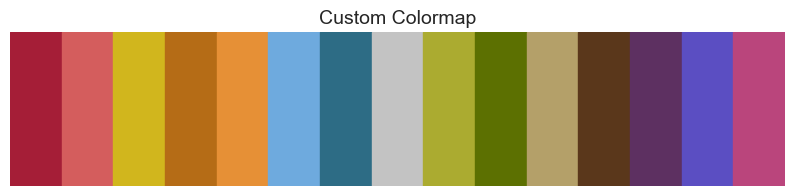

In [36]:
# define colors for the models

# base colors of QDS
base_colors = {
    "red": (165/255, 30/255, 55/255),
    "gray": (195/255, 195/255, 195/255),
    "lightgray": (203/255, 203/255, 203/255),
    "gold": (180/255, 160/255, 105/255),
}

hex_colors = [
    "#A51E37", "#D45D5D", "#D1B61D", "#B56C16", "#E69036",
    "#6EAADE", "#2D6C85", "#C3C3C3", "#ABAB30", "#5C7001",
    "#B4A069", "#5A371B", "#5D3061", "#5B4EC2", "#BA457C"
]

# Create a ListedColormap
custom_cmap = ListedColormap(hex_colors, name = "custom15")


# Visualize the colors
fig, ax = plt.subplots(figsize=(10, 2))
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(hex_colors))
ax.set_ylim(0, 1)
ax.axis("off")
plt.title("Custom Colormap", fontsize=14)
plt.show()

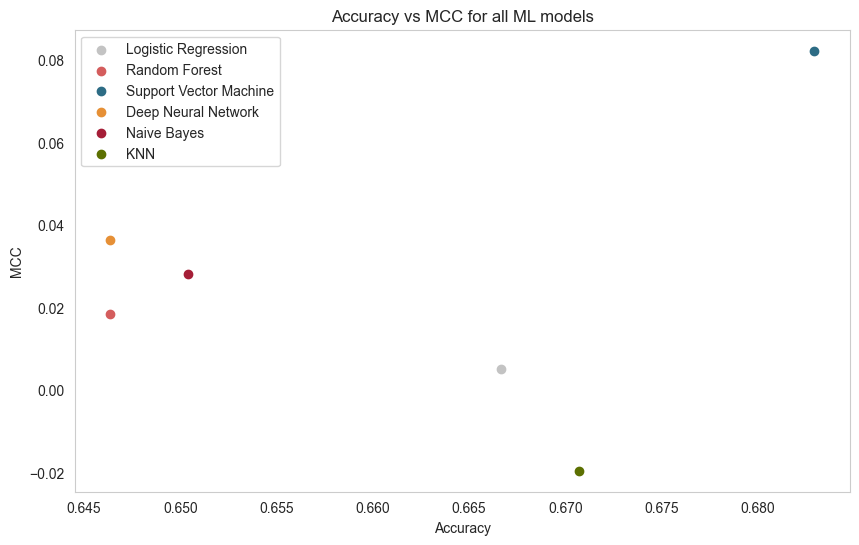

In [37]:
# plot accuracy (x-axis) and mcc (y-axis) for all models
plt.figure(figsize = (10, 6))

plt.scatter(metrics_lr["accuracy"], metrics_lr["mcc"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["accuracy"], metrics_rf["mcc"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["accuracy"], metrics_svc["mcc"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["accuracy"], metrics_dnn["mcc"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["accuracy"], metrics_nb["mcc"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["accuracy"], metrics_knn["mcc"], label = "KNN", color = hex_colors[9])
# plt.scatter(metrics_xgb["accuracy"], metrics_xgb["mcc"], label = "XGBoost", color = hex_colors[12])

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC for all ML models")
plt.legend()
plt.grid()
# plt.show()

# save as png
# plt.savefig("../doc/figs/accuracy_mcc.png", dpi = 300, bbox_inches = "tight")

In [38]:
# # plot recall vs precision for all models
# plt.figure(figsize = (10, 6))
# plt.scatter(metrics_lr["recall"], metrics_lr["precision"], label = "Logistic Regression", color = hex_colors[7])
# plt.scatter(metrics_rf["recall"], metrics_rf["precision"], label = "Random Forest", color = hex_colors[1])
# plt.scatter(metrics_svc["recall"], metrics_svc["precision"], label = "Support Vector Machine", color = hex_colors[6])
# plt.scatter(metrics_dnn["recall"], metrics_dnn["precision"], label = "Deep Neural Network", color = hex_colors[4])
# plt.scatter(metrics_nb["recall"], metrics_nb["precision"], label = "Naive Bayes", color = hex_colors[0])
# plt.scatter(metrics_knn["recall"], metrics_knn["precision"], label = "KNN", color = hex_colors[9])
#
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Recall vs Precision for all models")
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
# plt.grid()
# plt.show()

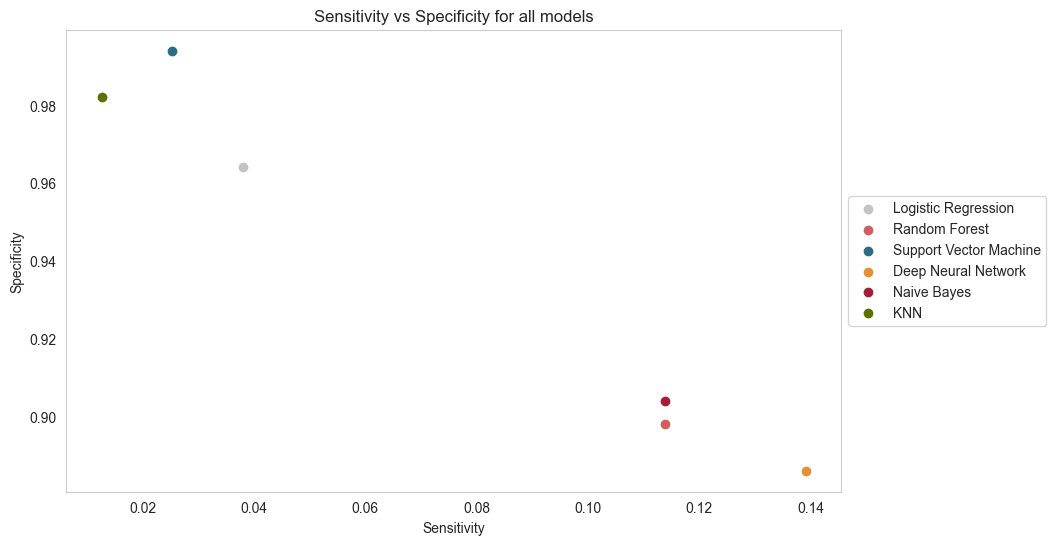

In [39]:
# sensitivity vs specificity
plt.figure(figsize = (10, 6))
plt.scatter(metrics_lr["sensitivity"], metrics_lr["specificity"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["sensitivity"], metrics_rf["specificity"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["sensitivity"], metrics_svc["specificity"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["sensitivity"], metrics_dnn["specificity"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["sensitivity"], metrics_nb["specificity"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["sensitivity"], metrics_knn["specificity"], label = "KNN", color = hex_colors[9])
# plt.scatter(metrics_xgb["sensitivity"], metrics_xgb["specificity"], label = "XGBoost", color = hex_colors[12])

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity for all models")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/sensitivity_specificity.png", dpi = 300, bbox_inches = "tight")

**Sensitivity** = Wie viel Prozent der predicted positives sind wirklich positiv. Wie viele der tatsächlich kranken Personen hat das Model erkannt?

**Specificity** = Wie viel Prozent der predicted negatives sind wirklich negativ. Wie viele der tatsächlich gesunden Personen hat das Model richtig ausgeschlossen (negativ predicted)?

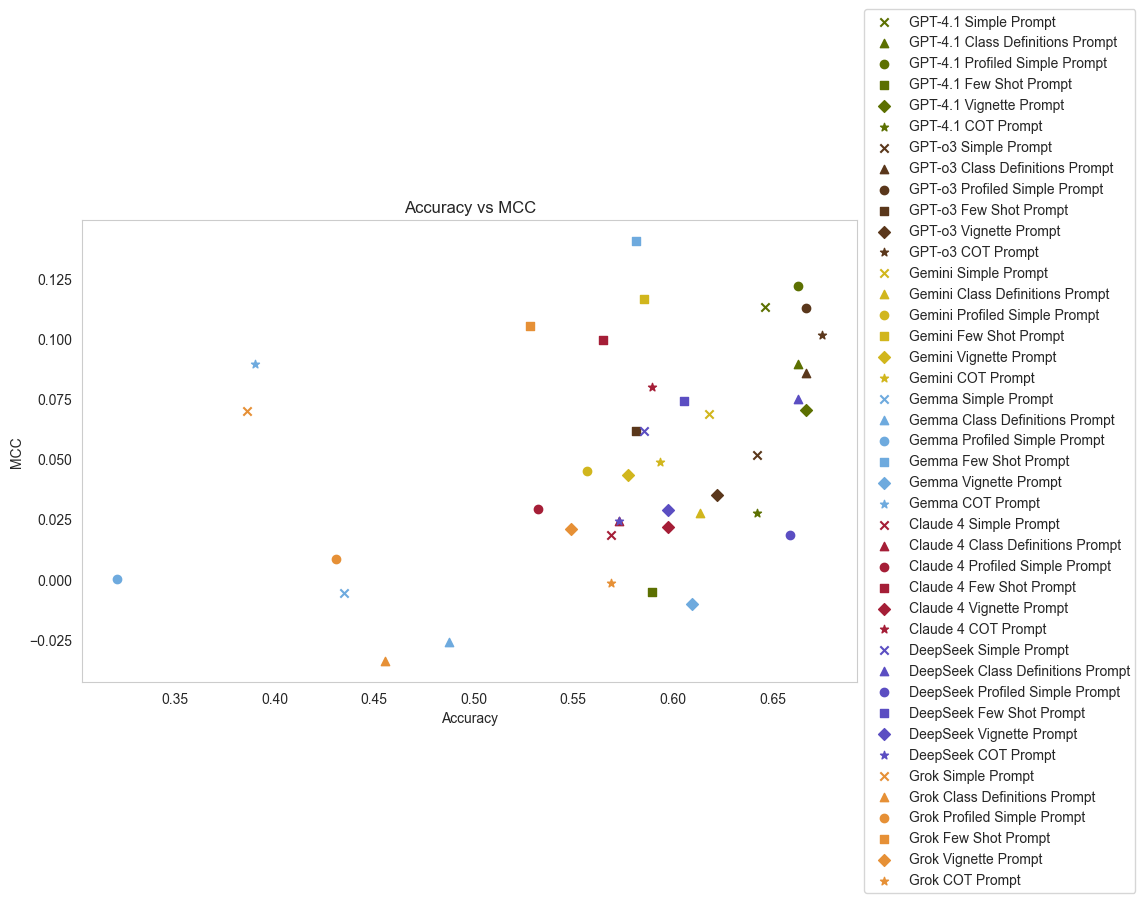

In [41]:
# plot all simple prompts for LLMs: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_simple_prompt["accuracy"], metrics_GPT_simple_prompt["mcc"], label = "GPT-4.1 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_class_def_prompt["accuracy"], metrics_GPT_class_def_prompt["mcc"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_profiled_simple_prompt["accuracy"], metrics_GPT_profiled_simple_prompt["mcc"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[9], marker = "o")
plt.scatter(metrics_GPT_few_shot_prompt["accuracy"], metrics_GPT_few_shot_prompt["mcc"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_vignette_prompt["accuracy"], metrics_GPT_vignette_prompt["mcc"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_cot_prompt["accuracy"], metrics_GPT_cot_prompt["mcc"], label = "GPT-4.1 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["accuracy"], metrics_GPT_o3_simple_prompt["mcc"], label = "GPT-o3 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["accuracy"], metrics_GPT_o3_class_definitions_prompt["mcc"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["accuracy"], metrics_GPT_o3_profiled_simple_prompt["mcc"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[11], marker = "o")
plt.scatter(metrics_GPT_o3_few_shot_prompt["accuracy"], metrics_GPT_o3_few_shot_prompt["mcc"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["accuracy"], metrics_GPT_o3_vignette_prompt["mcc"], label = "GPT-o3 Vignette Prompt", color = hex_colors[11], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["accuracy"], metrics_GPT_o3_cot_prompt["mcc"], label = "GPT-o3 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["accuracy"], metrics_Gemini_simple_prompt["mcc"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["accuracy"], metrics_Gemini_class_def_prompt["mcc"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["accuracy"], metrics_Gemini_profiled_simple_prompt["mcc"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "o")
plt.scatter(metrics_Gemini_few_shot_prompt["accuracy"], metrics_Gemini_few_shot_prompt["mcc"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
plt.scatter(metrics_Gemini_vignette_prompt["accuracy"], metrics_Gemini_vignette_prompt["mcc"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["accuracy"], metrics_Gemini_cot_prompt["mcc"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["accuracy"], metrics_Gemma_simple_prompt["mcc"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["accuracy"], metrics_Gemma_class_def_prompt["mcc"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["accuracy"], metrics_Gemma_profiled_simple_prompt["mcc"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "o")
plt.scatter(metrics_Gemma_few_shot_prompt["accuracy"], metrics_Gemma_few_shot_prompt["mcc"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["accuracy"], metrics_Gemma_vignette_prompt["mcc"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["accuracy"], metrics_Gemma_cot_prompt["mcc"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["accuracy"], metrics_Claude_4_simple_prompt["mcc"], label = "Claude 4 Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["accuracy"], metrics_Claude_4_class_def_prompt["mcc"], label = "Claude 4 Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["accuracy"], metrics_Claude_4_profiled_simple_prompt["mcc"], label = "Claude 4 Profiled Simple Prompt", color = hex_colors[0], marker = "o")
plt.scatter(metrics_Claude_4_few_shot_prompt["accuracy"], metrics_Claude_4_few_shot_prompt["mcc"], label = "Claude 4 Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["accuracy"], metrics_Claude_4_vignette_prompt["mcc"], label = "Claude 4 Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["accuracy"], metrics_Claude_4_cot_prompt["mcc"], label = "Claude 4 COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["accuracy"], metrics_DeepSeek_simple_prompt["mcc"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["accuracy"], metrics_DeepSeek_class_def_prompt["mcc"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["accuracy"], metrics_DeepSeek_profiled_simple_prompt["mcc"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "o")
plt.scatter(metrics_DeepSeek_few_shot_prompt["accuracy"], metrics_DeepSeek_few_shot_prompt["mcc"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["accuracy"], metrics_DeepSeek_vignette_prompt["mcc"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["accuracy"], metrics_DeepSeek_cot_prompt["mcc"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["accuracy"], metrics_Grok_simple_prompt["mcc"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["accuracy"], metrics_Grok_class_def_prompt["mcc"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["accuracy"], metrics_Grok_profiled_simple_prompt["mcc"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "o")
plt.scatter(metrics_Grok_few_shot_prompt["accuracy"], metrics_Grok_few_shot_prompt["mcc"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["accuracy"], metrics_Grok_vignette_prompt["mcc"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["accuracy"], metrics_Grok_cot_prompt["mcc"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

# plt.scatter(metrics_pov_all_models["accuracy"], metrics_pov_all_models["mcc"], label = "POV All Models", color = "black", marker = "P")
# plt.scatter(metrics_pov_ml_votes["accuracy"], metrics_pov_ml_votes["mcc"], label = "POV ML Votes", color = "black", marker = "X")
# plt.scatter(metrics_pov_simple_votes["accuracy"], metrics_pov_simple_votes["mcc"], label = "POV Simple Votes", color = "black", marker = "x")
# plt.scatter(metrics_pov_class_definitions_votes["accuracy"], metrics_pov_class_definitions_votes["mcc"], label = "POV Class Definitions Votes", color = "black", marker = "^")
# plt.scatter(metrics_pov_profiled_simple_votes["accuracy"], metrics_pov_profiled_simple_votes["mcc"], label = "POV Profiled Simple Votes", color = "black", marker = "o")
# plt.scatter(metrics_pov_few_shot_votes["accuracy"], metrics_pov_few_shot_votes["mcc"], label = "POV Few Shot Votes", color = "black", marker = "s")
# plt.scatter(metrics_pov_vignette_votes["accuracy"], metrics_pov_vignette_votes["mcc"], label = "POV Vignette Votes", color = "black", marker = "D")
# plt.scatter(metrics_pov_cot_votes["accuracy"], metrics_pov_cot_votes["mcc"], label = "POV COT Votes", color = "black", marker = "*")

# plt.scatter(metrics_best_LLM_or_best_ML["accuracy"], metrics_best_LLM_or_best_ML["mcc"], label = "Best LLM or Best ML", color = "blue", marker = "o")
#
# plt.scatter(metrics_new_input_dnn["accuracy"], metrics_new_input_dnn["mcc"], label = "New Input DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["accuracy"], metrics_new_input_svc["mcc"], label = "New Input SVC", color = "orange", marker = "D")
# plt.scatter(metrics_new_input_svc_2["accuracy"], metrics_new_input_svc_2["mcc"], label = "New Input SVC All train set", color = "purple", marker = "*")

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/accuracy_mcc_LLMs.png", dpi = 300, bbox_inches = "tight")

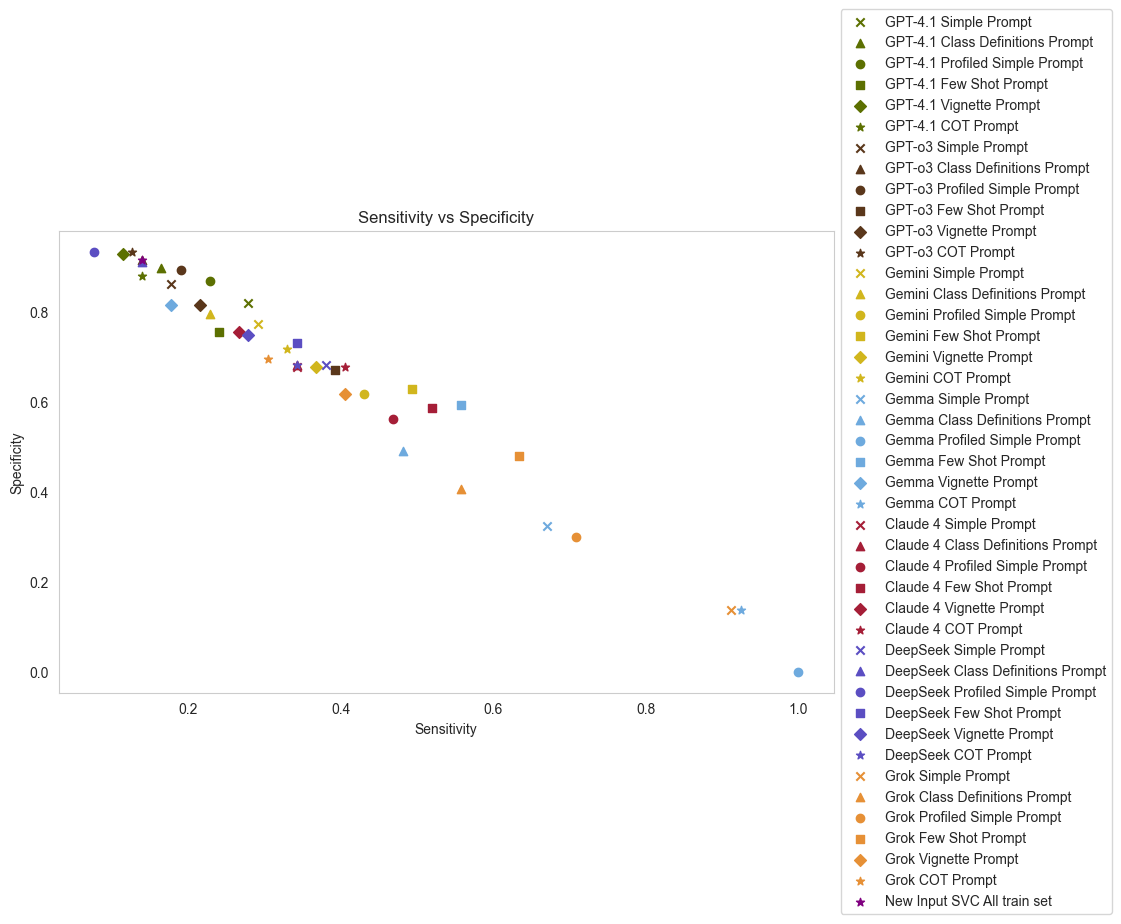

In [42]:
# plot sensitivity vs specificity for all simple prompts
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_simple_prompt["sensitivity"], metrics_GPT_simple_prompt["specificity"], label = "GPT-4.1 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_class_def_prompt["sensitivity"], metrics_GPT_class_def_prompt["specificity"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_profiled_simple_prompt["sensitivity"], metrics_GPT_profiled_simple_prompt["specificity"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[9], marker = "o")
plt.scatter(metrics_GPT_few_shot_prompt["sensitivity"], metrics_GPT_few_shot_prompt["specificity"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_vignette_prompt["sensitivity"], metrics_GPT_vignette_prompt["specificity"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_cot_prompt["sensitivity"], metrics_GPT_cot_prompt["specificity"], label = "GPT-4.1 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["sensitivity"], metrics_GPT_o3_simple_prompt["specificity"], label = "GPT-o3 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["sensitivity"], metrics_GPT_o3_class_definitions_prompt["specificity"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], metrics_GPT_o3_profiled_simple_prompt["specificity"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[11], marker = "o")
plt.scatter(metrics_GPT_o3_few_shot_prompt["sensitivity"], metrics_GPT_o3_few_shot_prompt["specificity"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["sensitivity"], metrics_GPT_o3_vignette_prompt["specificity"], label = "GPT-o3 Vignette Prompt", color = hex_colors[11], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["sensitivity"], metrics_GPT_o3_cot_prompt["specificity"], label = "GPT-o3 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["sensitivity"], metrics_Gemini_simple_prompt["specificity"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["sensitivity"], metrics_Gemini_class_def_prompt["specificity"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["sensitivity"], metrics_Gemini_profiled_simple_prompt["specificity"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "o")
plt.scatter(metrics_Gemini_few_shot_prompt["sensitivity"], metrics_Gemini_few_shot_prompt["specificity"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
plt.scatter(metrics_Gemini_vignette_prompt["sensitivity"], metrics_Gemini_vignette_prompt["specificity"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["sensitivity"], metrics_Gemini_cot_prompt["specificity"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["sensitivity"], metrics_Gemma_simple_prompt["specificity"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["sensitivity"], metrics_Gemma_class_def_prompt["specificity"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["sensitivity"], metrics_Gemma_profiled_simple_prompt["specificity"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "o")
plt.scatter(metrics_Gemma_few_shot_prompt["sensitivity"], metrics_Gemma_few_shot_prompt["specificity"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["sensitivity"], metrics_Gemma_vignette_prompt["specificity"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["sensitivity"], metrics_Gemma_cot_prompt["specificity"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["sensitivity"], metrics_Claude_4_simple_prompt["specificity"], label = "Claude 4 Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["sensitivity"], metrics_Claude_4_class_def_prompt["specificity"], label = "Claude 4 Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["sensitivity"], metrics_Claude_4_profiled_simple_prompt["specificity"], label = "Claude 4 Profiled Simple Prompt", color = hex_colors[0], marker = "o")
plt.scatter(metrics_Claude_4_few_shot_prompt["sensitivity"], metrics_Claude_4_few_shot_prompt["specificity"], label = "Claude 4 Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["sensitivity"], metrics_Claude_4_vignette_prompt["specificity"], label = "Claude 4 Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["sensitivity"], metrics_Claude_4_cot_prompt["specificity"], label = "Claude 4 COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["sensitivity"], metrics_DeepSeek_simple_prompt["specificity"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["sensitivity"], metrics_DeepSeek_class_def_prompt["specificity"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], metrics_DeepSeek_profiled_simple_prompt["specificity"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "o")
plt.scatter(metrics_DeepSeek_few_shot_prompt["sensitivity"], metrics_DeepSeek_few_shot_prompt["specificity"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["sensitivity"], metrics_DeepSeek_vignette_prompt["specificity"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["sensitivity"], metrics_DeepSeek_cot_prompt["specificity"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["sensitivity"], metrics_Grok_simple_prompt["specificity"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["sensitivity"], metrics_Grok_class_def_prompt["specificity"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["sensitivity"], metrics_Grok_profiled_simple_prompt["specificity"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "o")
plt.scatter(metrics_Grok_few_shot_prompt["sensitivity"], metrics_Grok_few_shot_prompt["specificity"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["sensitivity"], metrics_Grok_vignette_prompt["specificity"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["sensitivity"], metrics_Grok_cot_prompt["specificity"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

# plt.scatter(metrics_pov_all_models["sensitivity"], metrics_pov_all_models["specificity"], label = "POV All Models", color = "black", marker = "P")
# plt.scatter(metrics_pov_ml_votes["sensitivity"], metrics_pov_ml_votes["specificity"], label = "POV ML Votes", color = "black", marker = "X")
# plt.scatter(metrics_pov_simple_votes["sensitivity"], metrics_pov_simple_votes["specificity"], label = "POV Simple Votes", color = "black", marker = "x")
# plt.scatter(metrics_pov_class_definitions_votes["sensitivity"], metrics_pov_class_definitions_votes["specificity"], label = "POV Class Definitions Votes", color = "black", marker = "^")
# plt.scatter(metrics_pov_profiled_simple_votes["sensitivity"], metrics_pov_profiled_simple_votes["specificity"], label = "POV Profiled Simple Votes", color = "black", marker = "o")
# plt.scatter(metrics_pov_few_shot_votes["sensitivity"], metrics_pov_few_shot_votes["specificity"], label = "POV Few Shot Votes", color = "black", marker = "s")
# plt.scatter(metrics_pov_vignette_votes["sensitivity"], metrics_pov_vignette_votes["specificity"], label = "POV Vignette Votes", color = "black", marker = "D")
# plt.scatter(metrics_pov_cot_votes["sensitivity"], metrics_pov_cot_votes["specificity"], label = "POV COT Votes", color = "black", marker = "*")

# plt.scatter(metrics_best_LLM_or_best_ML["sensitivity"], metrics_best_LLM_or_best_ML["specificity"], label = "Best LLM or Best ML", color = "blue", marker = "o")
#
# plt.scatter(metrics_new_input_dnn["sensitivity"], metrics_new_input_dnn["specificity"], label = "New Input DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["sensitivity"], metrics_new_input_svc["specificity"], label = "New Input SVC", color = "green", marker = "o")
plt.scatter(metrics_new_input_svc_2["sensitivity"], metrics_new_input_svc_2["specificity"], label = "New Input SVC All train set", color = "purple", marker = "*")

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/sensitivity_specificity_LLMs.png", dpi = 300, bbox_inches = "tight")

## Unification Approaches

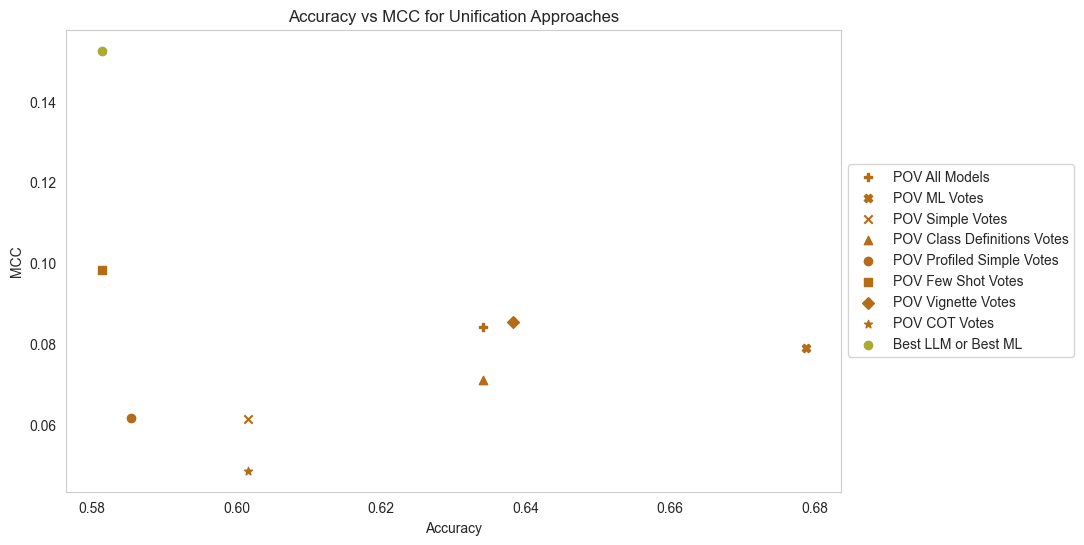

In [44]:
# plot all unification approaches: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_pov_all_models["accuracy"], metrics_pov_all_models["mcc"], label = "POV All Models", color = hex_colors[3], marker = "P")
plt.scatter(metrics_pov_ml_votes["accuracy"], metrics_pov_ml_votes["mcc"], label = "POV ML Votes", color = hex_colors[3], marker = "X")
plt.scatter(metrics_pov_simple_votes["accuracy"], metrics_pov_simple_votes["mcc"], label = "POV Simple Votes", color = hex_colors[3], marker = "x")
plt.scatter(metrics_pov_class_definitions_votes["accuracy"], metrics_pov_class_definitions_votes["mcc"], label = "POV Class Definitions Votes", color = hex_colors[3], marker = "^")
plt.scatter(metrics_pov_profiled_simple_votes["accuracy"], metrics_pov_profiled_simple_votes["mcc"], label = "POV Profiled Simple Votes", color = hex_colors[3], marker = "o")
plt.scatter(metrics_pov_few_shot_votes["accuracy"], metrics_pov_few_shot_votes["mcc"], label = "POV Few Shot Votes", color = hex_colors[3], marker = "s")
plt.scatter(metrics_pov_vignette_votes["accuracy"], metrics_pov_vignette_votes["mcc"], label = "POV Vignette Votes", color = hex_colors[3], marker = "D")
plt.scatter(metrics_pov_cot_votes["accuracy"], metrics_pov_cot_votes["mcc"], label = "POV COT Votes", color = hex_colors[3], marker = "*")

plt.scatter(metrics_best_LLM_or_best_ML["accuracy"], metrics_best_LLM_or_best_ML["mcc"], label = "Best LLM or Best ML", color = hex_colors[8], marker = "o")

# plt.scatter(metrics_new_input_dnn["accuracy"], metrics_new_input_dnn["mcc"], label = "New Input DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["accuracy"], metrics_new_input_svc["mcc"], label = "New Input SVC", color = "orange", marker = "D")
# plt.scatter(metrics_new_input_svc_2["accuracy"], metrics_new_input_svc_2["mcc"], label = "New Input SVC All train set", color = "purple", marker = "*")

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC for Unification Approaches")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/accuracy_mcc_unification.png", dpi = 300, bbox_inches = "tight")

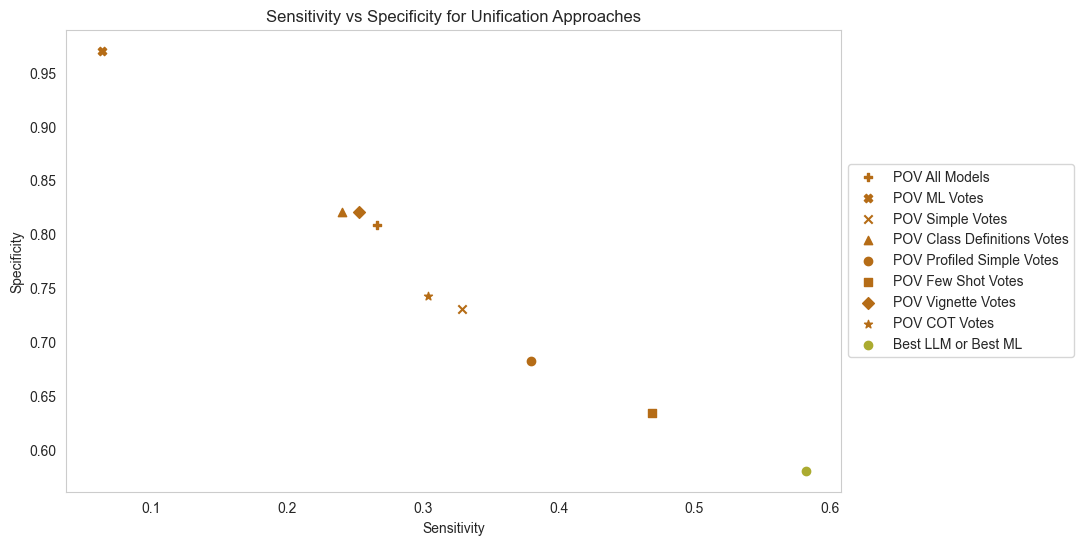

In [45]:
# plot sensitivity vs specificity for all unification approaches
plt.figure(figsize = (10, 6))

plt.scatter(metrics_pov_all_models["sensitivity"], metrics_pov_all_models["specificity"], label = "POV All Models", color = hex_colors[3], marker = "P")
plt.scatter(metrics_pov_ml_votes["sensitivity"], metrics_pov_ml_votes["specificity"], label = "POV ML Votes", color = hex_colors[3], marker = "X")
plt.scatter(metrics_pov_simple_votes["sensitivity"], metrics_pov_simple_votes["specificity"], label = "POV Simple Votes", color = hex_colors[3], marker = "x")
plt.scatter(metrics_pov_class_definitions_votes["sensitivity"], metrics_pov_class_definitions_votes["specificity"], label = "POV Class Definitions Votes", color = hex_colors[3], marker = "^")
plt.scatter(metrics_pov_profiled_simple_votes["sensitivity"], metrics_pov_profiled_simple_votes["specificity"], label = "POV Profiled Simple Votes", color = hex_colors[3], marker = "o")
plt.scatter(metrics_pov_few_shot_votes["sensitivity"], metrics_pov_few_shot_votes["specificity"], label = "POV Few Shot Votes", color = hex_colors[3], marker = "s")
plt.scatter(metrics_pov_vignette_votes["sensitivity"], metrics_pov_vignette_votes["specificity"], label = "POV Vignette Votes", color = hex_colors[3], marker = "D")
plt.scatter(metrics_pov_cot_votes["sensitivity"], metrics_pov_cot_votes["specificity"], label = "POV COT Votes", color = hex_colors[3], marker = "*")

plt.scatter(metrics_best_LLM_or_best_ML["sensitivity"], metrics_best_LLM_or_best_ML["specificity"], label = "Best LLM or Best ML", color = hex_colors[8], marker = "o")

# plt.scatter(metrics_new_input_dnn["sensitivity"], metrics_new_input_dnn["specificity"], label = "New Input DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["sensitivity"], metrics_new_input_svc["specificity"], label = "New Input SVC", color = "orange", marker = "D")
# plt.scatter(metrics_new_input_svc_2["sensitivity"], metrics_new_input_svc_2["specificity"], label = "New Input SVC All train set", color = "purple", marker = "*")

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity for Unification Approaches")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/sensitivity_specificity_unification.png", dpi = 300, bbox_inches = "tight")

# 3 Sensitivity vs Specificity

In [46]:
model_names = [
    "Logistic Regression", "Random Forest", "Support Vector Machine",
    "Deep Neural Network", "Naive Bayes", "KNN",
    "GPT-4.1 Simple Prompt", "GPT-4.1 Class Definitions Prompt",
    "GPT-4.1 Profiled Simple Prompt", "GPT-4.1 Few Shot Prompt",
    "GPT-4.1 Vignette Prompt", "GPT-4.1 COT Prompt",
    "GPT-o3 Simple Prompt", "GPT-o3 Class Definitions Prompt",
    "GPT-o3 Profiled Simple Prompt", "GPT-o3 Few Shot Prompt",
    "GPT-o3 Vignette Prompt", "GPT-o3 COT Prompt",
    "Gemini Simple Prompt", "Gemini Class Definitions Prompt",
    "Gemini Profiled Simple Prompt", "Gemini Few Shot Prompt",
    "Gemini Vignette Prompt", "Gemini COT Prompt",
    "Gemma Simple Prompt", "Gemma Class Definitions Prompt",
    "Gemma Profiled Simple Prompt", "Gemma Few Shot Prompt",
    "Gemma Vignette Prompt", "Gemma COT Prompt",
    "Claude 4 Simple Prompt", "Claude 4 Class Definitions Prompt",
    "Claude 4 Profiled Simple Prompt",
    "Claude 4 Few Shot Prompt", "Claude 4 Vignette Prompt",
    "Claude 4 COT Prompt", "DeepSeek Simple Prompt",
    "DeepSeek Class Definitions Prompt", "DeepSeek Profiled Simple Prompt",
    "DeepSeek Few Shot Prompt", "DeepSeek Vignette Prompt",
    "DeepSeek COT Prompt", "Grok Simple Prompt",
    "Grok Class Definitions Prompt", "Grok Profiled Simple Prompt",
    "Grok Few Shot Prompt", "Grok Vignette Prompt",
    "Grok COT Prompt", "POV All Models", "POV ML Votes",
    "POV Simple Votes", "POV Class Definitions Votes",
    "POV Profiled Simple Votes", "POV Few Shot Votes",
    "POV Vignette Votes", "POV COT Votes", "Best LLM or Best ML"
]

In [47]:
metrics = [
    metrics_lr, metrics_rf, metrics_svc, metrics_dnn, metrics_nb, metrics_knn,
    metrics_GPT_simple_prompt, metrics_GPT_class_def_prompt, metrics_GPT_profiled_simple_prompt,
    metrics_GPT_few_shot_prompt, metrics_GPT_vignette_prompt, metrics_GPT_cot_prompt,
    metrics_GPT_o3_simple_prompt, metrics_GPT_o3_class_definitions_prompt,
    metrics_GPT_o3_profiled_simple_prompt, metrics_GPT_o3_few_shot_prompt,
    metrics_GPT_o3_vignette_prompt, metrics_GPT_o3_cot_prompt,
    metrics_Gemini_simple_prompt, metrics_Gemini_class_def_prompt,
    metrics_Gemini_profiled_simple_prompt, metrics_Gemini_few_shot_prompt,
    metrics_Gemini_vignette_prompt, metrics_Gemini_cot_prompt,
    metrics_Gemma_simple_prompt, metrics_Gemma_class_def_prompt,
    metrics_Gemma_profiled_simple_prompt, metrics_Gemma_few_shot_prompt,
    metrics_Gemma_vignette_prompt, metrics_Gemma_cot_prompt,
    metrics_Claude_4_simple_prompt, metrics_Claude_4_class_def_prompt,
    metrics_Claude_4_profiled_simple_prompt, metrics_Claude_4_few_shot_prompt,
    metrics_Claude_4_vignette_prompt, metrics_Claude_4_cot_prompt,
    metrics_DeepSeek_simple_prompt, metrics_DeepSeek_class_def_prompt,
    metrics_DeepSeek_profiled_simple_prompt, metrics_DeepSeek_few_shot_prompt,
    metrics_DeepSeek_vignette_prompt, metrics_DeepSeek_cot_prompt,
    metrics_Grok_simple_prompt, metrics_Grok_class_def_prompt,
    metrics_Grok_profiled_simple_prompt, metrics_Grok_few_shot_prompt,
    metrics_Grok_vignette_prompt, metrics_Grok_cot_prompt,
    metrics_pov_all_models, metrics_pov_ml_votes, metrics_pov_simple_votes,
    metrics_pov_class_definitions_votes, metrics_pov_profiled_simple_votes,
    metrics_pov_few_shot_votes, metrics_pov_vignette_votes,
    metrics_pov_cot_votes, metrics_best_LLM_or_best_ML
]

In [48]:
# calculate for each model sensitivity + specificity and print it if sensitivity & specificity is each over 0.3
good_models_dic = {}

for idx, model in enumerate(metrics):
    sensitivity = model["sensitivity"]
    specificity = model["specificity"]

    if sensitivity > 0.3 and specificity > 0.3:
        good_models_dic[model_names[idx]] = {
            "sensitivity + specificity": sensitivity + specificity,
            "sensitivity": sensitivity,
            "specificity": specificity
        }

    # sort the dictionary by sensitivity + specificity
good_models_dic = dict(sorted(good_models_dic.items(), key=lambda item: item[1]["sensitivity + specificity"], reverse = True))
# print the good models
for model, metrics in good_models_dic.items():
    print(f"{model}: Sensitivity + Specificity: {metrics['sensitivity + specificity']:.2f}, Sensitivity: {metrics['sensitivity']:.2f}, Specificity: {metrics['specificity']:.2f}")

Best LLM or Best ML: Sensitivity + Specificity: 1.16, Sensitivity: 0.58, Specificity: 0.58
Gemma Few Shot Prompt: Sensitivity + Specificity: 1.15, Sensitivity: 0.56, Specificity: 0.59
Gemini Few Shot Prompt: Sensitivity + Specificity: 1.12, Sensitivity: 0.49, Specificity: 0.63
Grok Few Shot Prompt: Sensitivity + Specificity: 1.11, Sensitivity: 0.63, Specificity: 0.48
Claude 4 Few Shot Prompt: Sensitivity + Specificity: 1.11, Sensitivity: 0.52, Specificity: 0.59
POV Few Shot Votes: Sensitivity + Specificity: 1.10, Sensitivity: 0.47, Specificity: 0.63
Claude 4 COT Prompt: Sensitivity + Specificity: 1.08, Sensitivity: 0.41, Specificity: 0.68
DeepSeek Few Shot Prompt: Sensitivity + Specificity: 1.07, Sensitivity: 0.34, Specificity: 0.73
GPT-o3 Few Shot Prompt: Sensitivity + Specificity: 1.06, Sensitivity: 0.39, Specificity: 0.67
DeepSeek Simple Prompt: Sensitivity + Specificity: 1.06, Sensitivity: 0.38, Specificity: 0.68
POV Profiled Simple Votes: Sensitivity + Specificity: 1.06, Sensitivi

In [49]:
gpt_4_metrics = [
    metrics_GPT_simple_prompt, metrics_GPT_class_def_prompt,
    metrics_GPT_profiled_simple_prompt, metrics_GPT_few_shot_prompt,
    metrics_GPT_vignette_prompt, metrics_GPT_cot_prompt
]

gpt_4_metrics =[
    metrics_GPT_o3_simple_prompt, metrics_GPT_o3_class_definitions_prompt,
    metrics_GPT_o3_profiled_simple_prompt, metrics_GPT_o3_few_shot_prompt,
    metrics_GPT_o3_vignette_prompt, metrics_GPT_o3_cot_prompt

]

gemini_metrics = [
    metrics_Gemini_simple_prompt, metrics_Gemini_class_def_prompt,
    metrics_Gemini_profiled_simple_prompt, metrics_Gemini_few_shot_prompt,
    metrics_Gemini_vignette_prompt, metrics_Gemini_cot_prompt
]

gemma_metrics = [
    metrics_Gemma_simple_prompt, metrics_Gemma_class_def_prompt,
    metrics_Gemma_profiled_simple_prompt, metrics_Gemma_few_shot_prompt,
    metrics_Gemma_vignette_prompt, metrics_Gemma_cot_prompt
]

claude_metrics = [
    metrics_Claude_4_simple_prompt, metrics_Claude_4_class_def_prompt,
    metrics_Claude_4_profiled_simple_prompt, metrics_Claude_4_few_shot_prompt,
    metrics_Claude_4_vignette_prompt, metrics_Claude_4_cot_prompt
]

deepseek_metrics = [
    metrics_DeepSeek_simple_prompt, metrics_DeepSeek_class_def_prompt,
    metrics_DeepSeek_profiled_simple_prompt, metrics_DeepSeek_few_shot_prompt,
    metrics_DeepSeek_vignette_prompt, metrics_DeepSeek_cot_prompt
]

grok_metrics = [
    metrics_Grok_simple_prompt, metrics_Grok_class_def_prompt,
    metrics_Grok_profiled_simple_prompt, metrics_Grok_few_shot_prompt,
    metrics_Grok_vignette_prompt, metrics_Grok_cot_prompt
]

In [50]:
# calculate the average sensitivity and specificity of the GPT, Gemini etc
avg_sensitivity = {}
avg_specificity = {}
avg_mcc = {}
avg_spec_sens = {}

for model_name, model_metrics in zip(
        ["GPT-4.1", "GPT-o3", "Gemini", "Gemma", "Claude 4", "DeepSeek", "Grok"],
        [gpt_4_metrics, gpt_4_metrics, gemini_metrics, gemma_metrics, claude_metrics, deepseek_metrics, grok_metrics]
):
    avg_sensitivity[model_name] = np.mean([m["sensitivity"] for m in model_metrics])
    avg_specificity[model_name] = np.mean([m["specificity"] for m in model_metrics])
    avg_mcc[model_name] = np.mean([m["mcc"] for m in model_metrics])
    avg_spec_sens[model_name] = avg_sensitivity[model_name] + avg_specificity[model_name]

# print the average sensitivity and specificity of the GPT, Gemini etc
for model_name in avg_sensitivity.keys():
    print(f"{model_name}: MCC: {avg_mcc[model_name]:.2f}, Sensitivity + Specificity: {avg_spec_sens[model_name]:.2f}, Sensitivity: {avg_sensitivity[model_name]:.2f}, Specificity: {avg_specificity[model_name]:.2f}")


GPT-4.1: MCC: 0.07, Sensitivity + Specificity: 1.06, Sensitivity: 0.21, Specificity: 0.85
GPT-o3: MCC: 0.07, Sensitivity + Specificity: 1.06, Sensitivity: 0.21, Specificity: 0.85
Gemini: MCC: 0.06, Sensitivity + Specificity: 1.06, Sensitivity: 0.36, Specificity: 0.70
Gemma: MCC: 0.03, Sensitivity + Specificity: 1.03, Sensitivity: 0.64, Specificity: 0.39
Claude 4: MCC: 0.05, Sensitivity + Specificity: 1.05, Sensitivity: 0.39, Specificity: 0.66
DeepSeek: MCC: 0.05, Sensitivity + Specificity: 1.04, Sensitivity: 0.26, Specificity: 0.78
Grok: MCC: 0.03, Sensitivity + Specificity: 1.03, Sensitivity: 0.59, Specificity: 0.44


In [51]:
for model_name, model_metrics in zip(
        ["Logistic Regression", "Random Forest", "Support Vector Machine",
         "Deep Neural Network", "Naive Bayes", "KNN"],
        [metrics_lr, metrics_rf, metrics_svc, metrics_dnn, metrics_nb, metrics_knn]):
    print(f"{model_name}: MCC: {model_metrics['mcc']:.2f}, Sensitivity + Specificity: {model_metrics['sensitivity'] + model_metrics['specificity']:.2f}, Sensitivity: {model_metrics['sensitivity']:.2f}, Specificity: {model_metrics['specificity']:.2f}")

Logistic Regression: MCC: 0.01, Sensitivity + Specificity: 1.00, Sensitivity: 0.04, Specificity: 0.96
Random Forest: MCC: 0.02, Sensitivity + Specificity: 1.01, Sensitivity: 0.11, Specificity: 0.90
Support Vector Machine: MCC: 0.08, Sensitivity + Specificity: 1.02, Sensitivity: 0.03, Specificity: 0.99
Deep Neural Network: MCC: 0.04, Sensitivity + Specificity: 1.03, Sensitivity: 0.14, Specificity: 0.89
Naive Bayes: MCC: 0.03, Sensitivity + Specificity: 1.02, Sensitivity: 0.11, Specificity: 0.90
KNN: MCC: -0.02, Sensitivity + Specificity: 0.99, Sensitivity: 0.01, Specificity: 0.98
